In [2]:
# Import libraries used in the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Exploring Fandando Displayed Scores versus True User Ratings

In [3]:
# Create a dataframe from "fandango_scrape.csv"
fandango = pd.read_csv("fandango_scrape.csv")

In [4]:
# The shape of the dataframe
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
# Informations of the dataframe
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
# Statistical properties of the dataframe
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<Axes: xlabel='RATING', ylabel='VOTES'>

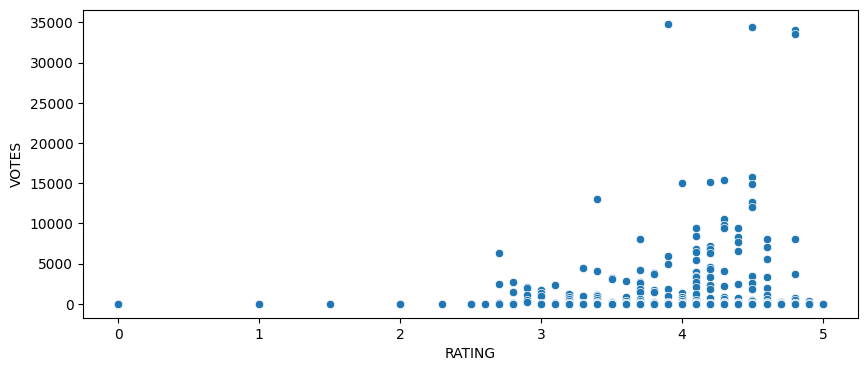

In [7]:
# Relationship between popularity of a film and its rating. It was create a scatterplot showing the relationship between rating and votes.
plt.figure(figsize=(10,4))
sns.scatterplot(data=fandango, y='VOTES', x='RATING')

**Coments**: This graphic shows that there is a direct relationship between popularity of the film and its rating. The better the film, according to the audience, the greater its popularity.

In [8]:
# Correlation between the columns
fandango.corr()

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_17292\1084039871.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fandango.corr()


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Coments**: We can see that there is a high correlation between "rating" and "stars", in order or 0.9947. It isn't a perfect correlation,  
since there are rounding in the conversion from "rating" to "stars". 

In [9]:
# Create a new column that is able to strip the year from the title strings and set this new column as YEAR
fandango['YEAR'] = fandango['FILM'].apply(lambda title: title.split(' ')[-1].replace("(", "").replace(")", ""))

In [10]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [11]:
# Question: How many movies are in the Fandando DataFrame per year?
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<Axes: xlabel='YEAR', ylabel='count'>

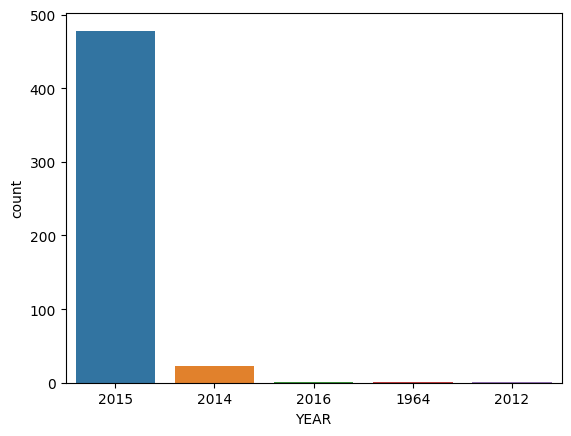

In [12]:
# Visualize the count of movies per year
sns.countplot(data=fandango, x='YEAR')

In [13]:
# Question: What are the 10 movies with the highest number of votes?
fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [14]:
# Question: How many movies have zero votes?
len(fandango[fandango['VOTES'] == 0])

69

In [15]:
# Create a new Dataframe of only reviewed films by removing any films that have zero votes.
fan_review = fandango[fandango['VOTES'] > 0]

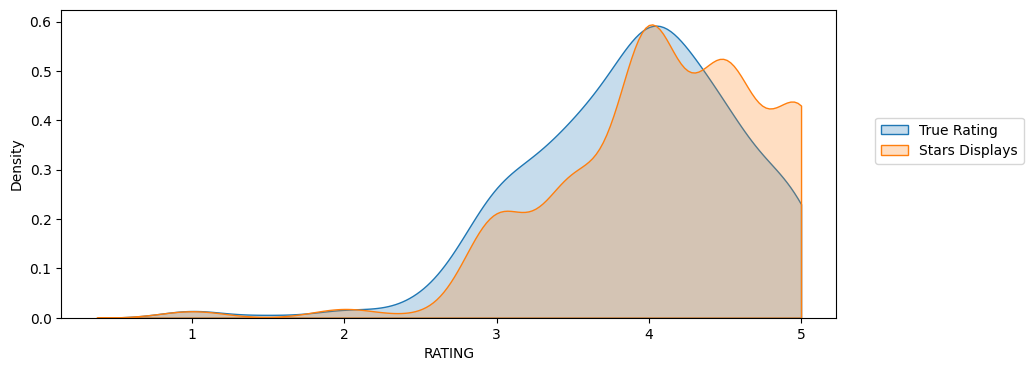

In [16]:
# Create a KDE plot that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING).
plt.figure(figsize=(10,4))

sns.kdeplot(data=fan_review, x='RATING', clip=[0,5], fill=True, label='True Rating')
sns.kdeplot(data=fan_review, x='STARS', clip=[0,5], fill=True, label='Stars Displays')

plt.legend(loc=(1.05, 0.5))

**Coments**: In this graph, we can see the comparison between "true rating" and "stars displayed". It's noticeable the difference in films with 4.5 to 5.0 rating, in which the "star displayed" is always bigger than the "true rating".

In [17]:
# Quantification of this discrepancy between "stars displayed" and "true rating" by calculating the difference of "stars" and "rating"

fan_review['STARS_DIFF'] = fan_review['STARS'] - fan_review['RATING']

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_17292\352582410.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_review['STARS_DIFF'] = fan_review['STARS'] - fan_review['RATING']


In [18]:
fan_review['STARS_DIFF'] = fan_review['STARS_DIFF'].round(2)
fan_review

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_17292\1570831979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_review['STARS_DIFF'] = fan_review['STARS_DIFF'].round(2)


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


<Axes: xlabel='STARS_DIFF', ylabel='count'>

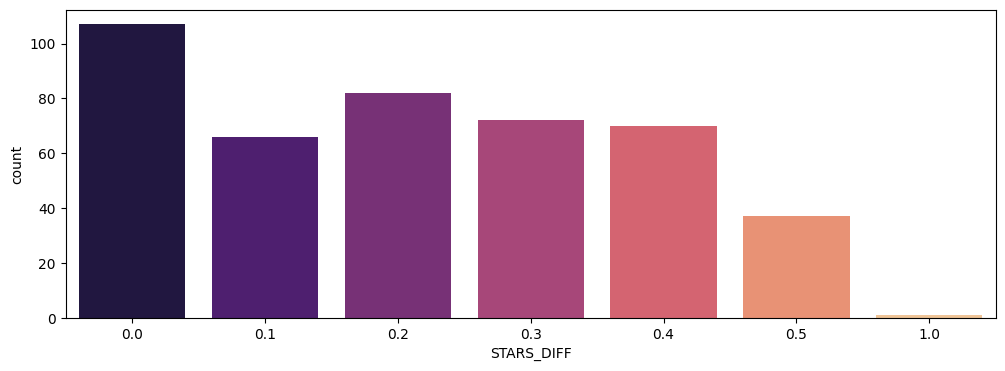

In [19]:
# Create a count plot to display the number of times a certain difference occurs
plt.figure(figsize=(12,4))
sns.countplot(data=fan_review, x='STARS_DIFF', palette='magma')

**Coments**: In this graph, we can conclude that most of the films shows differences in the result for "stars" and "rating". There are important differences and very frequent, like the difference of 0.2 that appears around 80 times or 0.4 that appears around 70 times.

In [20]:
# One particular film was displaying over a 1 star difference tham its rating, whatfilm had this close to 1 star differential?
fan_review[fan_review['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


### Comparison of Fandango Ratings to Other Sites

In [21]:
# Create a dataframe from "all_sites_scores.csv"
all_sites = pd.read_csv("all_sites_scores.csv")

In [22]:
# The shape of the dataframe
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [23]:
# Informations of the dataframe
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [24]:
# Statistical properties of the dataframe
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


#### Rotten Tomatoes

(0.0, 100.0)

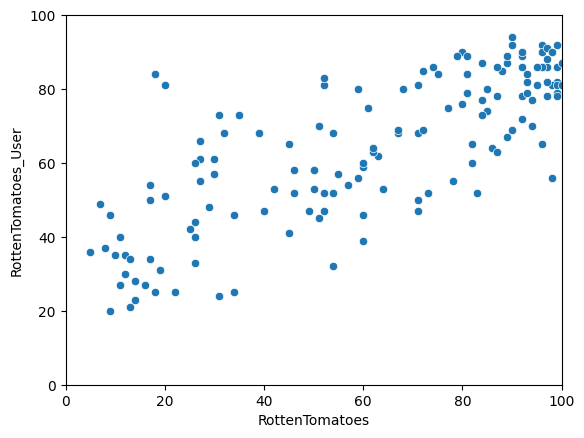

In [25]:
# Scatterplot exploring the relationship between RT Critic reviews and RT User reviews

sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User')
plt.ylim(0,100)
plt.xlim(0,100)

**Coments**: In general, we can notice a linear relationship between the rating of users and critics.

In [26]:
# For quantify the difference by comparing the critics RT rating and user RT rating, we calculated the difference between "RottenTomatoes" and
# "RottenTomatoes_User". So values closer to 0 means agreement between these factors, larger positive values means critics rated much higher than
# users and larger negative values means users rated much higher than critics.

all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']


In [27]:
# The Mean Absolute Difference between RT scores and RT User scores as described above.

all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

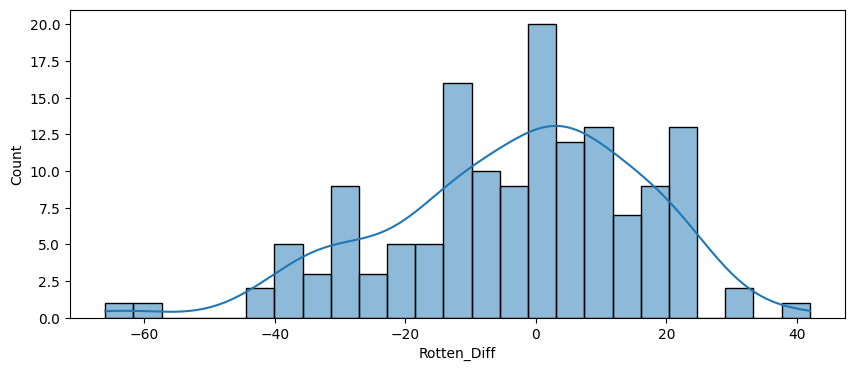

In [28]:
# Distribution of the differences between RT Critics Score and RT User Score usint KDE and Histograms to display this distribution
plt.figure(figsize=(10,4))
sns.histplot(data=all_sites, x='Rotten_Diff', kde=True, bins=25)

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

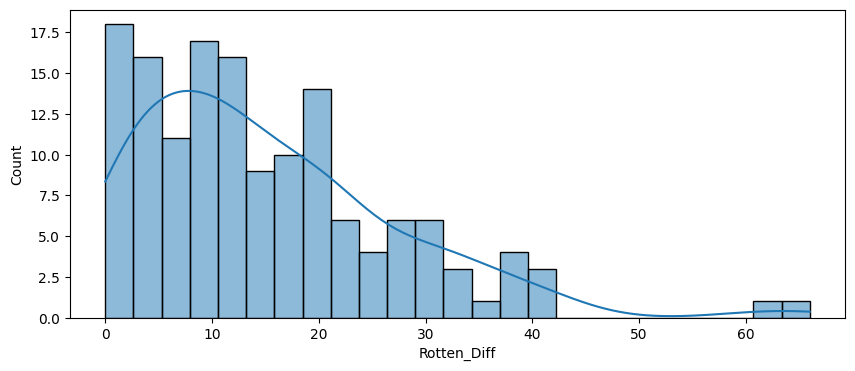

In [29]:
plt.figure(figsize=(10,4))
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs), kde=True, bins=25)

**Coments**: There is a significant difference between the user scores and critics scores of the Rotten Tomatoes, but which movies are causing the largest differences?

In [30]:
# What are the top 5 movies users rated higher than critics on average?
all_sites.nsmallest(5, 'Rotten_Diff')['FILM']

3         Do You Believe? (2015)
85             Little Boy (2015)
105      Hitman: Agent 47 (2015)
134      The Longest Ride (2015)
125    The Wedding Ringer (2015)
Name: FILM, dtype: object

In [31]:
# What are the top 5 movies critics rated higher than users on average?
all_sites.nlargest(5, 'Rotten_Diff')['FILM']

69                    Mr. Turner (2014)
112                   It Follows (2015)
115            While We're Young (2015)
37                 Welcome to Me (2015)
40     I'll See You In My Dreams (2015)
Name: FILM, dtype: object

#### MetaCritic

(0.0, 100.0)

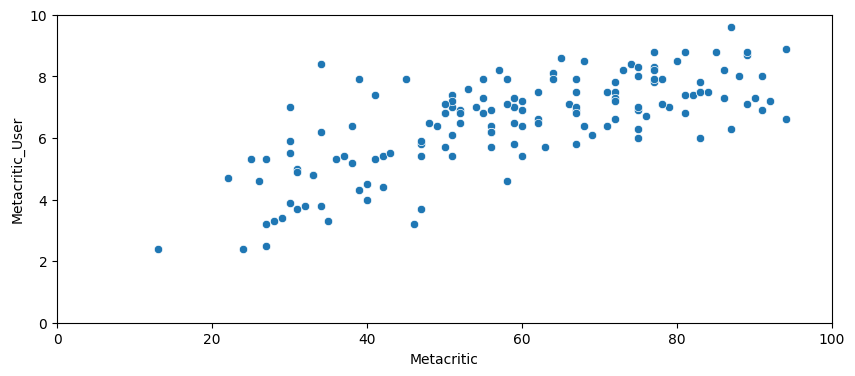

In [32]:
# Scatterplot exploring the relationship between Metacritic Critic reviews and Metacritic User reviews

plt.figure(figsize=(10,4))
sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User')
plt.ylim(0,10)
plt.xlim(0,100)

**Coments**: This relationship also have a linear behavior, but less sensitive in relation to users score.

#### IMDB

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

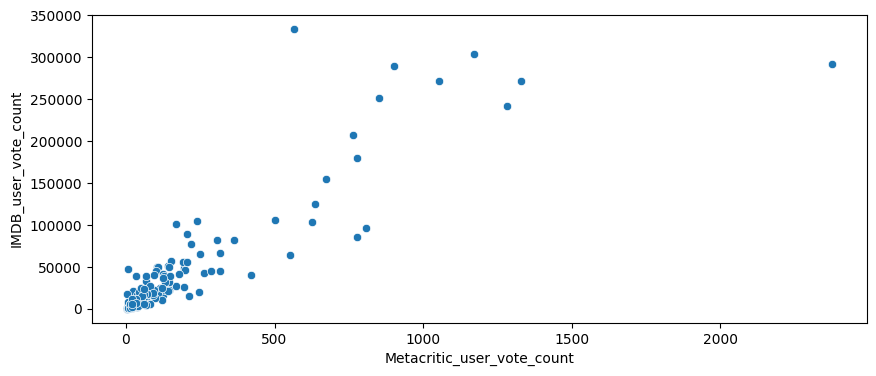

In [33]:
# Scatterplot exploring the relationship between Metacritic user vote count and IMDB user vote count

plt.figure(figsize=(10,4))
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')


**Coments**: Note that, in these comparison, there are two outliers. The film the highest vote count on IMDB only has about 500 Metacritic rating. What is this movie? 

In [34]:
# What movie has the highest IMDB user vote count?
all_sites.nlargest(1, 'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [35]:
# What movie has the highest Metacritic User Vote count?
all_sites.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


### Fandango Scores vs. All Sites

Let's explore whether or not Fandango ariticially displays higher ratings than warranted to boost ticket sales.

Initially, we conbine the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. We only want to compare movies that are in both DataFrames.

In [36]:
df = pd.merge(fandango, all_sites, on = 'FILM', how='inner')

In [37]:
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


Notice that RT, Metacritic and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to normalize these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

In [39]:
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_Diff                       42.0
Name: max, dtype: float64

In [40]:
# Normalize of the critics and users Rotten_Tomatoes ratings.
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] = np.round(df['RottenTomatoes_User']/20,1)

In [41]:
# Normalize of the critics and users Metacritic ratings.
df['Meta_Norm'] = np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] = np.round(df['Metacritic_User']/2,1)

In [42]:
# Normalize of the critics IMDB ratings.
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [43]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


To simplified the analysis, we need to create a norm_scores Dataframe that only contains the normalizes ratings. Include both STARS and RATING from the original Fandango table.

In [44]:
norm_scores = df[['STARS', 'RATING','RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]

In [45]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparing Distribution of Scores Across Sites
Now we going to see if Fandango display abnormally high ratings. We already know it pushs displayed RATING higher than STARS, bur are the rating themselves higher than average? 

In [46]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_17292\191327130.py:3: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


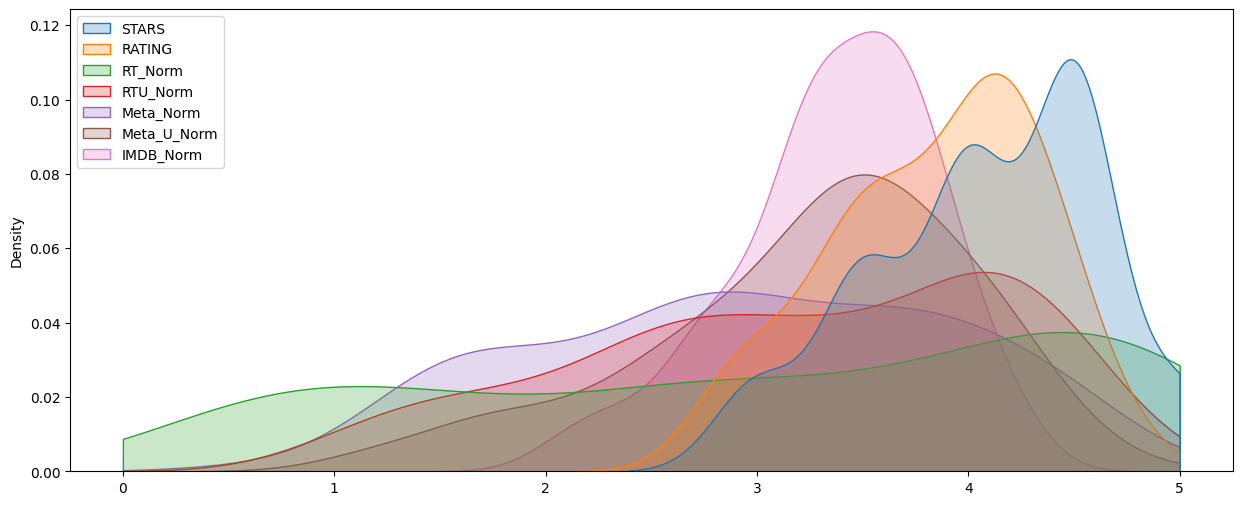

In [47]:
# Plot comparing the distributions of normalized ratings across all sites.
fig, ax = plt.subplots(figsize=(15,6))

sns.kdeplot(data = norm_scores, clip = [0,5], fill=True)

move_legend(ax, "upper left")

With this plot, we can prove that Fandango has bigger ratings than the mean of the other sites. Clearly Fandango has an uneven distribution, we can also see that RT critics have the most uniform distribution.

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_17292\191327130.py:3: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


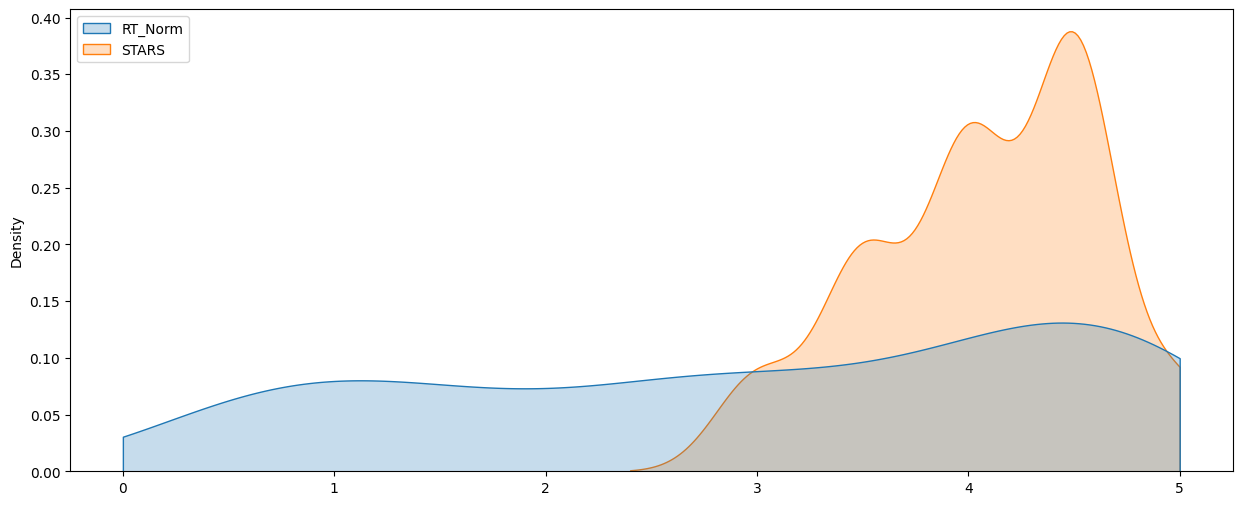

In [48]:
# Plot comparing the distributions of normalized ratings of RT critics and Fandango ratings.
fig, ax = plt.subplots(figsize=(15,6))

sns.kdeplot(data = norm_scores[['RT_Norm', 'STARS']], clip = [0,5], fill=True)

move_legend(ax, "upper left")

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_17292\191327130.py:3: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


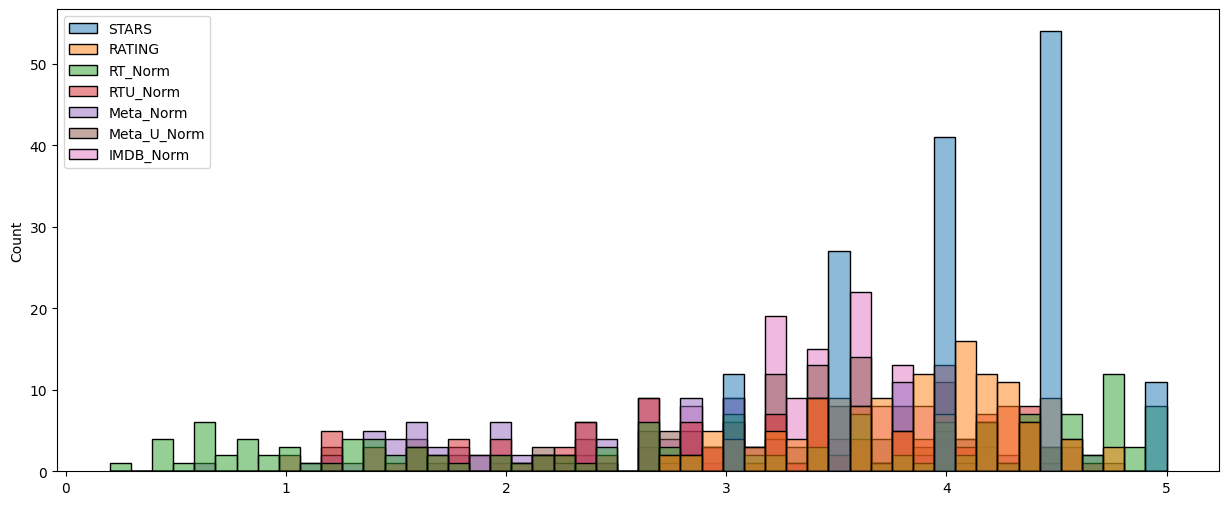

In [49]:
fig, ax = plt.subplots(figsize=(15,6))

sns.histplot(norm_scores,bins=50)

move_legend(ax, "upper left")

How are the worst movies rated across all platforms?

We can create a clustermap visualization of all normalized scores and note the differences in ratings, highly rated movies should be clustered together versus poorly rated movies.

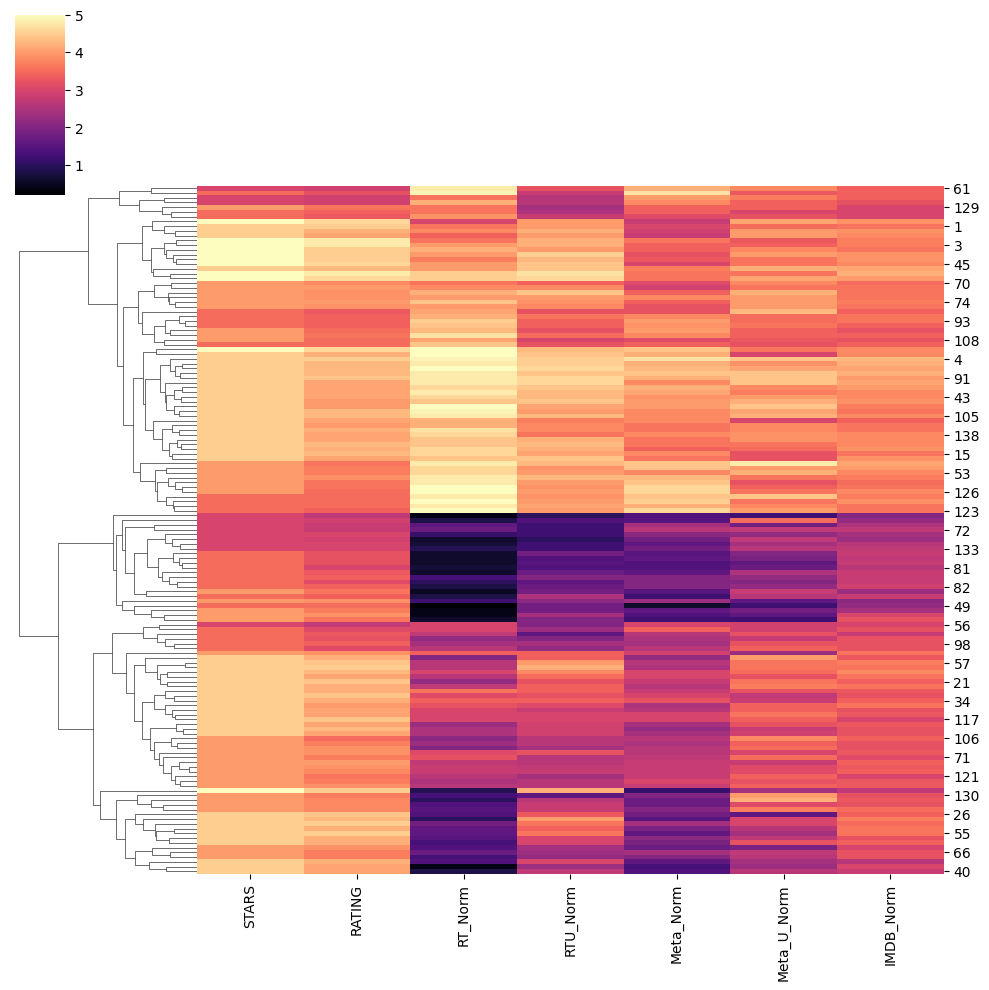

In [50]:
import scipy
sns.clustermap(norm_scores, cmap='magma', col_cluster=False)

Clearly Fandango is rating movies much higher than other sites, especiall considering that it is then displaying a rounded up version of the rating.

Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies?

In [53]:
norm_films = df[['FILM', 'STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]

In [55]:
worst_films = norm_films.nsmallest(10, 'RT_Norm')

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_17292\191327130.py:3: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


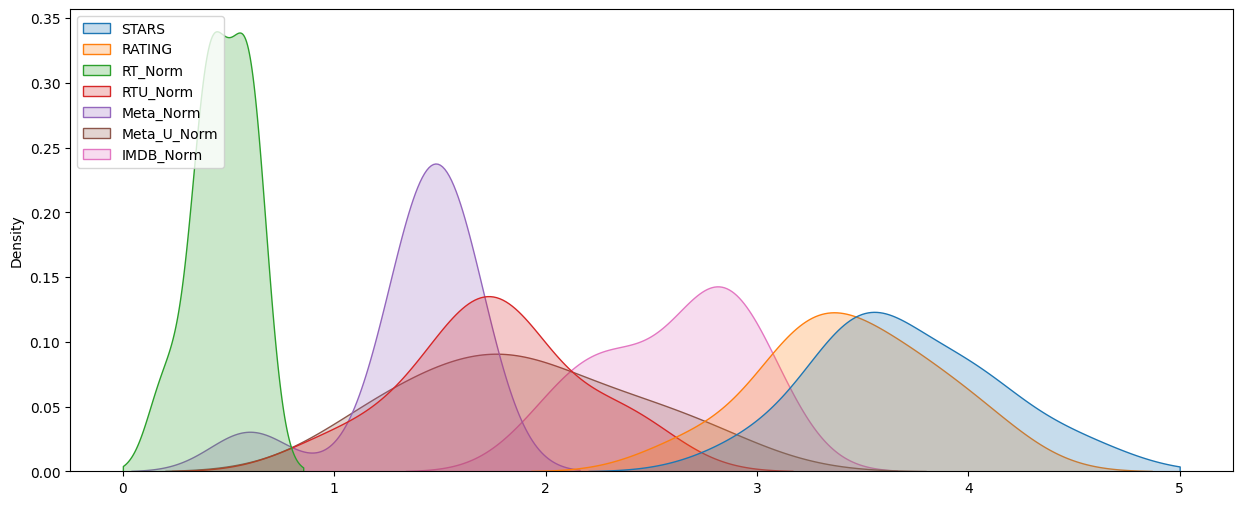

In [56]:
# Plot comparing the worst movies.
fig, ax = plt.subplots(figsize=(15,6))

sns.kdeplot(data = worst_films, clip = [0,5], fill=True)

move_legend(ax, "upper left")

Fandango is showing around 3-4 star ratings for films that are clearly bad. For instance, the movie Taken 3 is displaying 4.5 stars in Fandango, in other platforms this film has an average rating of 1.86, like showed above.

In [59]:
worst_films[worst_films['FILM'] == 'Taken 3 (2015)']

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0


In [64]:
average_platforms = (worst_films[worst_films['FILM'] == 'Taken 3 (2015)']['RT_Norm'] + worst_films[worst_films['FILM'] == 'Taken 3 (2015)']['RTU_Norm'] + worst_films[worst_films['FILM'] == 'Taken 3 (2015)']['Meta_Norm'] + worst_films[worst_films['FILM'] == 'Taken 3 (2015)']['Meta_U_Norm'] + worst_films[worst_films['FILM'] == 'Taken 3 (2015)']['IMDB_Norm'])/5


In [65]:
average_platforms

25    1.86
dtype: float64